In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

import torchvision
from torchvision.transforms import v2
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [2]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

## Train and Validation Sets

Training Set: samples used to fit machine learning models under construction Validation set: different samples to evaluate trained ML models. Still possible to tune and control model at this stage Test Set: separate sample, unseen dataset to provide unbiased final evaluation of model fit

In [3]:
# build train and validation set
train_set = torchvision.datasets.CIFAR10("./data", train=True, download=True)
valid_set = torchvision.datasets.CIFAR10("./data", train=False, download=True)

In [4]:
x_0, y_0 = train_set[0]

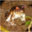

In [5]:
x_0

In [6]:
type(x_0)

PIL.Image.Image

## Tensors
tensor is an n-dimensional array representing any number of dimensions. Example Pixels can be represented in 3-dimensional tensor (width, height, color channel). Video games use matrix math to calculate pixels similarly to neural networks. Thats why GPUs effective tensor processing machines

In [7]:
trans = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]) # old way is transforms.ToTensor
x_0_tensor = trans(x_0)

In [8]:
x_0_tensor.dtype

torch.float32

Image Range 0 to 255

In [9]:
x_0_tensor.min()

tensor(0.)

In [10]:
x_0_tensor.max()

tensor(1.)

In [11]:
x_0_tensor.size() # color channel x height x width

torch.Size([3, 32, 32])

In [12]:
x_0_tensor

Image([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
        [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
        [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
        ...,
        [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
        [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
        [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

       [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
        [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
        [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
        ...,
        [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
        [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
        [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

       [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
        [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
        [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.1647],
        ..

In [13]:
x_0_tensor.device

device(type='cpu')

### Remember to move to GPU

In [14]:
x_0_gpu = x_0_tensor.cuda()
x_0_gpu.device

device(type='cuda', index=0)

In [15]:
# if cuda not recognized do
x_0_gpu = x_0_tensor.to(device)
x_0_gpu.device

device(type='cuda', index=0)

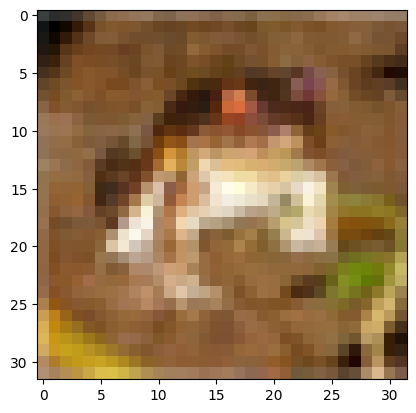

In [16]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image)

## Prepare to Train Data

In [17]:
trans = v2.Compose([v2.ToImage(),  v2.ToDtype(torch.float32, scale=True)])

# apply list of transforms to dataset by setting transform attr
train_set.transform = trans
valid_set.transform = trans

## Data Loaders

We can shuffle up our dataset instead of showing the model the entire data set. Smaller batches are more efficient for model training. You don't need to shuffle for validation since the model is not learning.



In [18]:
batch_size = 32
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=batch_size)

## Creating the Model


In [19]:
layers = []

## Flatten the Model

Since we are dealing with images with 3-dimensions, we should flatten the model combine all these images into 1 dimension. 3x32x32 => [3072]

In [20]:
layers = [
    nn.Flatten()
]

layers


[Flatten(start_dim=1, end_dim=-1)]

## Input Layer

We can use a Linear layer. This will be densely connected meaning each neuron's weights will affect every neuron in the next layer

In [21]:
input_size = 3 * 32 * 32 # 3 channels since CIFAR10 uses RGB, use 1 channel if greyscale like in MNIST

You can choose different amount of neurons and different activation functions

In [22]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512), # num neurons
    nn.ReLU()
]

## Hidden Layer

We can add more layers. It will need to know the input_size. Since the previous layer computes one number, the num of inputs into the hidden layer is the same as number of neurons in previous layer

In [23]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512), # num neurons
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU()
]

In [24]:
num_of_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 1024), # num neurons
    nn.ReLU(), # activation for input
    nn.Linear(1024, 512), # hidden layer, can reduce output neurons for abstract features
    nn.ReLU(), # activation for hidden
    nn.Linear(512, num_of_classes) # output layer
]

layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=3072, out_features=1024, bias=True),
 ReLU(),
 Linear(in_features=1024, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

In [25]:
model = nn.Sequential(*layers) # create model. using * operator will unpack a list

In [26]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=1024, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1024, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [27]:
next(model.parameters()).device

device(type='cuda', index=0)

In [28]:
model = torch.compile(model) # faster performance!

## Training the Model

often called fitting a model to data. We need to provide a way to grade the model using a loss function.

In [29]:
loss_function = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters())

In [30]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)



In [31]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [32]:
# train function

def train():
  loss = 0
  accuracy = 0

  model.train() # set model to training mode
  for x, y in train_loader:
    x, y = x.to(device), y.to(device)
    output = model(x)
    optimizer.zero_grad()
    batch_loss = loss_function(output, y)
    batch_loss.backward()
    optimizer.step()

    loss += batch_loss.item()
    accuracy += get_batch_accuracy(output,y, train_N)

  print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))


In [33]:
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            # no learning step
            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

# Training Loop

Epoch is one complete pass of the entire dataset.

In [34]:
epochs = 10

for epoch in range(epochs):
  print('Epoch: {}'.format(epoch))
  train()
  validate()


Epoch: 0
Train - Loss: 2876.4725 Accuracy: 0.3316
Valid - Loss: 536.8578 Accuracy: 0.3832
Epoch: 1
Train - Loss: 2607.9618 Accuracy: 0.3999
Valid - Loss: 505.1417 Accuracy: 0.4293
Epoch: 2
Train - Loss: 2482.1719 Accuracy: 0.4297
Valid - Loss: 479.5519 Accuracy: 0.4532
Epoch: 3
Train - Loss: 2389.1781 Accuracy: 0.4517
Valid - Loss: 483.8424 Accuracy: 0.4522
Epoch: 4
Train - Loss: 2320.3579 Accuracy: 0.4672
Valid - Loss: 476.4684 Accuracy: 0.4647
Epoch: 5
Train - Loss: 2272.1966 Accuracy: 0.4788
Valid - Loss: 470.7712 Accuracy: 0.4602
Epoch: 6
Train - Loss: 2228.7790 Accuracy: 0.4864
Valid - Loss: 459.6576 Accuracy: 0.4838
Epoch: 7
Train - Loss: 2195.5978 Accuracy: 0.4935
Valid - Loss: 459.6126 Accuracy: 0.4856
Epoch: 8
Train - Loss: 2171.4922 Accuracy: 0.5025
Valid - Loss: 454.0336 Accuracy: 0.4833
Epoch: 9
Train - Loss: 2143.1516 Accuracy: 0.5068
Valid - Loss: 468.7966 Accuracy: 0.4724


In [35]:
x_0_gpu_batch = x_0_gpu.unsqueeze(0) # used to add a batch dimension [1, 3, 32, 32]
prediction = model(x_0_gpu_batch)
prediction # should see 10 numbers

tensor([[-1.6290, -1.3535,  0.2477,  0.5414, -0.6502, -0.1236,  0.8479, -0.9263,
         -2.5341, -2.1415]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)

In [36]:
prediction.argmax(dim=1, keepdim=True)

tensor([[6]], device='cuda:0')

In [37]:
y_0


6

It guessed 6 correctly!

For CIFAR10, our Fully connected (FC) model may be at its limit. Next step would be to create a convolutional neural network for this!